<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-files" data-toc-modified-id="Example-files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example files</a></span></li><li><span><a href="#Manipulating-with-udapi" data-toc-modified-id="Manipulating-with-udapi-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Manipulating with <code>udapi</code></a></span></li></ul></div>

In [1]:
import os
import conllu
from conllu.exceptions import ParseException
from conllu import TokenList

In [2]:
from nltk.parse.dependencygraph import DependencyGraph, treebank_data
from nltk.tree import Tree

In [3]:
from IPython.display import display, Image
import pydotplus

In [4]:
def parse_file(path):
    with open(path) as f:
        txt = f.read()
    try:
        c = conllu.parse(txt)
    except ParseException:
        txt = txt.replace('    ', '\t')
        c = conllu.parse(txt)
    return c

In [5]:
def make_dg_tree(toklist: TokenList) -> None:
    tstr = "\n".join([f'{t["form"]}\t\
                        {t["upos"]}\t\
                        {t["head"]}\t\
                        {t["deprel"]}' for t in toklist if type(t['id']) is int])
    return DependencyGraph(tstr, top_relation_label='root')

In [6]:
def display_dg_tree(dggraph):
    dot_tree = pydotplus.graph_from_dot_data(dggraph.to_dot())
    png = dot_tree.create_png()
    display(Image(png))

## Greek

In [7]:
grc_txt = '''# sent_id = 21
# text = ὡς εἴπερ ἄρξεις τῆσδε γῆς, ὥσπερ κρατεῖς, ξὺν ἀνδράσιν κάλλιον ἢ κενῆς κρατεῖν·
1	ὡς	ὡς	SCONJ	c--------	_	12	mark	12:mark	Ref=54
2	εἴπερ	εἴπερ	SCONJ	c--------	_	3	mark	3:mark	Ref=54
3	ἄρξεις	ἄρχω	VERB	v2sfia---	Mood=Ind|Number=Sing|Person=2|Tense=Fut|Voice=Act	12	advcl	12:advcl	Ref=54
4	τῆσδε	ὅδε	DET	p-s---fg-	Case=Gen|Gender=Fem|Number=Sing|PronType=Dem	5	det	5:det	Ref=54
5	γῆς	γῆ	NOUN	n-s---fg-	Case=Gen|Gender=Fem|Number=Sing	3	obj	3:obj	Ref=54|SpaceAfter=No
6	,	,	PUNCT	u--------	_	8	punct	8:punct	Ref=54
7	ὥσπερ	ὥσπερ	SCONJ	c--------	_	8	mark	8:mark	Ref=54
8	κρατεῖς	κρατέω	VERB	v2spia---	Mood=Ind|Number=Sing|Person=2|Tense=Pres|Voice=Act	15	advcl	15:advcl	Ref=54|SpaceAfter=No
9	,	,	PUNCT	u--------	_	8	punct	8:punct	Ref=54
10	ξὺν	σύν	ADP	r--------	_	11	case	11:case	Ref=55
11	ἀνδράσιν	ἀνήρ	NOUN	n-p---md-	Case=Dat|Gender=Masc|Number=Plur	15	obl	15:obl	Ref=55
12	κάλλιον	καλός	ADJ	a-s---nnc	Case=Nom|Degree=Cmp|Gender=Neut|Number=Sing	0	root	0:root	Ref=55
13	ἢ	ἤ	CCONJ	c--------	_	14	mark	13.1:mark	Ref=55
13.1	E13.1	_	_	_	_	_	_	12:advcl	_
14	κενῆς	κενός	ADJ	a-s---fg-	Case=Gen|Gender=Fem|Number=Sing	12	advcl	13.1:advcl|13.1:obj	Ref=55
15	κρατεῖν	κρατέω	VERB	v--pna---	Tense=Pres|VerbForm=Inf|Voice=Act	12	csubj	12:csubj	Ref=55|SpaceAfter=No
16	·	·	PUNCT	u--------	_	12	punct	12:punct	Ref=55
'''

In [8]:
cg = conllu.parse(grc_txt)

In [11]:
grc_sent = cg[0]
grc_sent[12]

{'id': 13,
 'form': 'ἢ',
 'lemma': 'ἤ',
 'upos': 'CCONJ',
 'xpos': 'c--------',
 'feats': None,
 'head': 14,
 'deprel': 'mark',
 'deps': [('mark', (13, '.', 1))],
 'misc': {'Ref': '55'}}

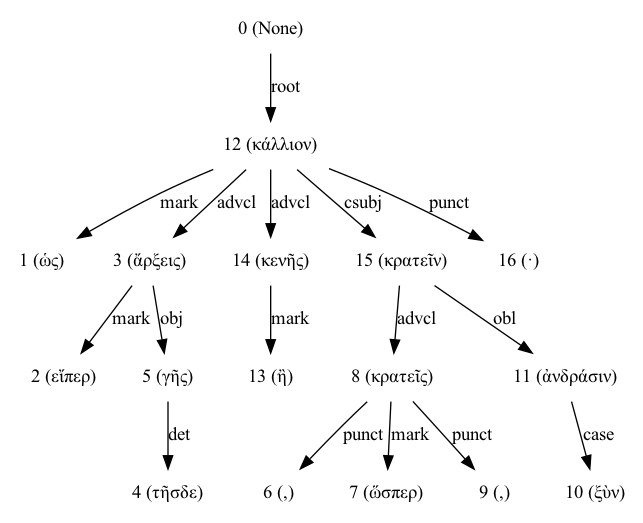

In [10]:
display_dg_tree(make_dg_tree(grc_sent))

## Example files

In [108]:
c = parse_file('./it_vit-ud-test.conllu')

In [109]:
sent = c[0]
t = sent[0]

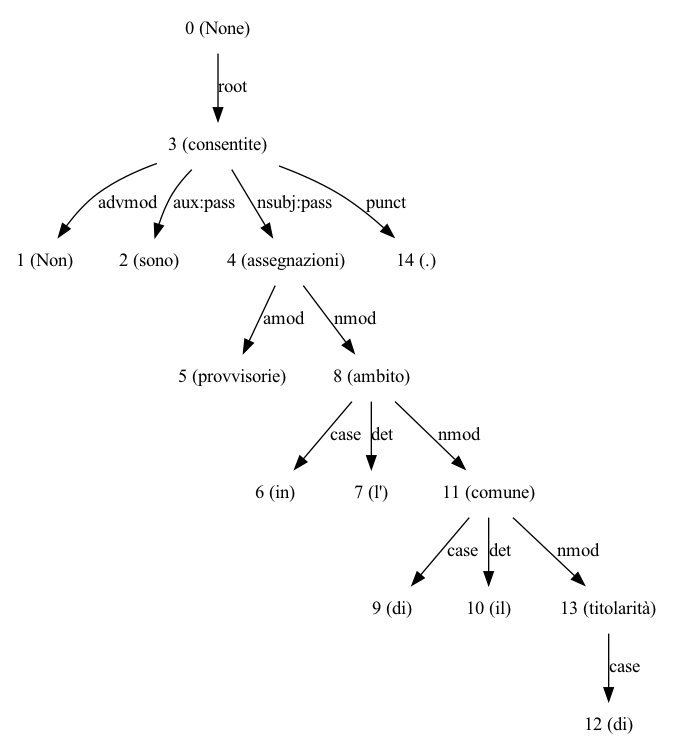

In [9]:
dg = make_dg_tree(sent)
display_dg_tree(dg)

It's also possible to draw with the `pretty_print` function of NLTK Trees

In [10]:
dg.tree().pretty_print()

                         consentite                                      
  ___________________________|___________                                 
 |   |    |                         assegnazioni                         
 |   |    |        ______________________|_________                       
 |   |    |       |                              ambito                  
 |   |    |       |           _____________________|______                
 |   |    |       |          |           |              comune           
 |   |    |       |          |           |          ______|________       
 |   |    |       |          |           |         |      |    titolarità
 |   |    |       |          |           |         |      |        |      
Non sono  .  provvisorie     in          l'        di     il       di    



In [11]:
sent.metadata['text']

"Non sono consentite assegnazioni provvisorie nell'ambito del comune di titolarità."

## Manipulating with `udapi`

In [68]:
from udapi.core.document import Document

In [69]:
doc = Document()

In [71]:
doc.from_conllu_string(sent.serialize())

In [72]:
tree = next(doc.trees)
tks = tree.descendants

In [73]:
doc.draw()

loaded_from = None
# sent_id = VIT-4751
# text = Non sono consentite assegnazioni provvisorie nell'ambito del comune di titolarità.
─┮
 │ ╭─╼ Non ADV advmod
 │ ┢─╼ sono AUX aux:pass
 ╰─┾ consentite VERB root
   ┡─┮ assegnazioni NOUN nsubj:pass
   │ ┡─╼ provvisorie ADJ amod
   │ │ ╭─╼ in ADP case
   │ │ ┢─╼ l' DET det
   │ ╰─┾ ambito NOUN nmod
   │   │ ╭─╼ di ADP case
   │   │ ┢─╼ il DET det
   │   ╰─┾ comune NOUN nmod
   │     │ ╭─╼ di ADP case
   │     ╰─┶ titolarità NOUN nmod
   ╰─╼ . PUNCT punct



In [61]:
t = tks[-3]
print(t.form)

comune


In [62]:
tree = next(doc.trees)

This is how you delete a node in `udapi`

In [46]:
t.remove("rehang_warn")

In [47]:
doc.draw()

loaded_from = None
# sent_id = VIT-4751
# text = Non sono consentite assegnazioni provvisorie nell'ambito del comune di titolarità.
─┮
 │ ╭─╼ Non ADV advmod
 │ ┢─╼ sono AUX aux:pass
 ╰─┾ consentite VERB root
   ┡─┮ assegnazioni NOUN nsubj:pass
   │ ┡─╼ provvisorie ADJ amod
   │ │ ╭─╼ in ADP case
   │ │ ┢─╼ l' DET det
   │ ╰─┾ ambito NOUN nmod
   │   │ ╭─╼ di ADP case
   │   │ ┢─╼ il DET det
   │   ╰─┾ comune NOUN nmod
   │     ╰─╼ titolarità NOUN nmod
   ╰─╼ . PUNCT punct



How you add a new empty node (**careful**: the node won't have any `ord` attribute: you must set it yourself)

In [75]:
newnode = tree.create_empty_child()
newnode._ord = 8.1

And here's how you delete it

In [89]:
tree.empty_nodes

In [95]:
for i,e in enumerate(tree.empty_nodes):
    if e.ord == 8.1:
        tree.empty_nodes.pop(i)

In [96]:
print(doc.to_conllu_string())

# sent_id = VIT-4751
# text = Non sono consentite assegnazioni provvisorie nell'ambito del comune di titolarità.
1	Non	non	ADV	BN	PronType=Neg	3	advmod	_	_
2	sono	essere	AUX	VA	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	3	aux:pass	_	_
3	consentite	consentire	VERB	V	Gender=Fem|Number=Plur|Tense=Past|VerbForm=Part	0	root	_	_
4	assegnazioni	assegnazione	NOUN	S	Gender=Fem|Number=Plur	3	nsubj:pass	_	_
5	provvisorie	provvisorio	ADJ	A	Gender=Fem|Number=Plur	4	amod	_	_
6-7	nell'	_	_	_	_	_	_	_	_
6	in	in	ADP	E	_	8	case	_	_
7	l'	il	DET	RD	Definite=Def|Number=Sing|PronType=Art	8	det	_	_
8	ambito	ambito	NOUN	S	Gender=Masc|Number=Sing	4	nmod	_	_
9-10	del	_	_	_	_	_	_	_	_
9	di	di	ADP	E	_	11	case	_	_
10	il	il	DET	RD	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	11	det	_	_
11	comune	comune	NOUN	S	Gender=Masc|Number=Sing	8	nmod	_	_
12	di	di	ADP	E	_	13	case	_	_
13	titolarità	titolarità	NOUN	S	Gender=Fem	11	nmod	_	SpaceAfter=No
14	.	.	PUNCT	FS	_	3	punct	_	_




In [106]:
dg_grc = make_dg_tree(grc_sent)
print(dg_grc.to_dot())

digraph G{
edge [dir=forward]
node [shape=plaintext]

0 [label="0 (None)"]
0 -> 12 [label="root"]
1 [label="1 (ὡς)"]
2 [label="2 (εἴπερ)"]
3 [label="3 (ἄρξεις)"]
3 -> 2 [label="mark"]
3 -> 5 [label="obj"]
4 [label="4 (τῆσδε)"]
5 [label="5 (γῆς)"]
5 -> 4 [label="det"]
6 [label="6 (,)"]
7 [label="7 (ὥσπερ)"]
8 [label="8 (κρατεῖς)"]
8 -> 6 [label="punct"]
8 -> 9 [label="punct"]
8 -> 7 [label="mark"]
9 [label="9 (,)"]
10 [label="10 (ξὺν)"]
11 [label="11 (ἀνδράσιν)"]
11 -> 10 [label="case"]
12 [label="12 (κάλλιον)"]
12 -> 1 [label="mark"]
12 -> 3 [label="advcl"]
12 -> 14 [label="advcl"]
12 -> 15 [label="csubj"]
12 -> 16 [label="punct"]
13 [label="13 (ἢ)"]
14 [label="14 (κενῆς)"]
14 -> 13 [label="mark"]
15 [label="15 (κρατεῖν)"]
15 -> 8 [label="advcl"]
15 -> 11 [label="obl"]
16 [label="16 (·)"]
}


In [119]:
pos_dotcolor_map = {
    "ADJ" : "dodgerblue2",
    "ADP" : "darkgreen",
    "ADV" : "darkgoldenrod1",
    "AUX" : "darkolivegreen1",
    "CCONJ" : "deeppink",
    "DET" : "darkturquoise",
    "INTJ" : "gold",
    "NOUN" : "cyan4",
    "NUM" : "burlywood",
    "PART" : "darksalmon",
    "PRON" : "darkviolet",
    "PROPN" : "cornflowerblue",
    "PUNCT" : "dimgray",
    "SCONJ" : "chartreuse",
    "SYM" : "gainsboro",
    "VERB" : "firebrick3",
    "X" : "gray16",
}

In [135]:
def deps_to_dot(toklist: "conllu.TokenList") -> "str":
    dot_str = '''digraph G{
    bgcolor="snow1"
    edge [dir=forward]
    node [shape=plaintext]

    0 [label="Root (0)" fontcolor="midnightblue"]

    '''

    def get_id(el_id):
        if type(el_id) is tuple:
            return "".join([str(e) for e in el_id])
        else:
            return str(el_id)


    for node in toklist:
        nid = get_id(node['id'])
        upos = node['upos']
        color = pos_dotcolor_map.get(upos, 'gray16')
        form = node['form']
        if '-' in nid:
            continue
        dot_str += f'{nid} [label="{form}" fontcolor="{color}"]\n'
        
    for tok in toklist:
        nid = get_id(tok['id'])
        deps = tok['deps']
        for dep in deps:
            dip = get_id(dep[1])
            dot_str += f'{dip} -> {nid} [label="{dep[0]}"]\n'
    dot_str += '}'

    return dot_str

In [136]:
print(deps_to_dot(grc_sent))

digraph G{
    bgcolor="snow1"
    edge [dir=forward]
    node [shape=plaintext]

    0 [label="Root (0)" fontcolor="midnightblue"]

    1 [label="ὡς" fontcolor="chartreuse"]
2 [label="εἴπερ" fontcolor="chartreuse"]
3 [label="ἄρξεις" fontcolor="firebrick3"]
4 [label="τῆσδε" fontcolor="darkturquoise"]
5 [label="γῆς" fontcolor="cyan4"]
6 [label="," fontcolor="dimgray"]
7 [label="ὥσπερ" fontcolor="chartreuse"]
8 [label="κρατεῖς" fontcolor="firebrick3"]
9 [label="," fontcolor="dimgray"]
10 [label="ξὺν" fontcolor="darkgreen"]
11 [label="ἀνδράσιν" fontcolor="cyan4"]
12 [label="κάλλιον" fontcolor="dodgerblue2"]
13 [label="ἢ" fontcolor="deeppink"]
13.1 [label="E13.1" fontcolor="gray16"]
14 [label="κενῆς" fontcolor="dodgerblue2"]
15 [label="κρατεῖν" fontcolor="firebrick3"]
16 [label="·" fontcolor="dimgray"]
12 -> 1 [label="mark"]
3 -> 2 [label="mark"]
12 -> 3 [label="advcl"]
5 -> 4 [label="det"]
3 -> 5 [label="obj"]
8 -> 6 [label="punct"]
8 -> 7 [label="mark"]
15 -> 8 [label="advcl"]
8 -> 9 [la

In [122]:
nids =[ "".join(str(node['id'])) for node in grc_sent]
nids

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 "(13, '.', 1)",
 '14',
 '15',
 '16']

In [141]:
print(sent.serialize())

# sent_id = VIT-4751
# text = Non sono consentite assegnazioni provvisorie nell'ambito del comune di titolarità.
1	Non	non	ADV	BN	PronType=Neg	3	advmod	_	_
2	sono	essere	AUX	VA	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	3	aux:pass	_	_
3	consentite	consentire	VERB	V	Gender=Fem|Number=Plur|Tense=Past|VerbForm=Part	0	root	_	_
4	assegnazioni	assegnazione	NOUN	S	Gender=Fem|Number=Plur	3	nsubj:pass	_	_
5	provvisorie	provvisorio	ADJ	A	Gender=Fem|Number=Plur	4	amod	_	_
6-7	nell'	_	_	_	_	_	_	_	SpaceAfter=No
6	in	in	ADP	E	_	8	case	_	_
7	l'	il	DET	RD	Definite=Def|Number=Sing|PronType=Art	8	det	_	_
8	ambito	ambito	NOUN	S	Gender=Masc|Number=Sing	4	nmod	_	_
9-10	del	_	_	_	_	_	_	_	_
9	di	di	ADP	E	_	11	case	_	_
10	il	il	DET	RD	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	11	det	_	_
11	comune	comune	NOUN	S	Gender=Masc|Number=Sing	8	nmod	_	_
12	di	di	ADP	E	_	13	case	_	_
13	titolarità	titolarità	NOUN	S	Gender=Fem	11	nmod	_	SpaceAfter=No
14	.	.	PUNCT	FS	_	3	punct	_	_


